In [49]:
import numpy as np
import matplotlib.pyplot as plt

from __future__ import print_function

import os
import subprocess

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn import tree

from sklearn.metrics import mean_squared_error

In [50]:
# Retrieve current working directory (`cwd`)
cwd = os.getcwd()
cwd

# Change directory 
os.chdir(r"C:\Users\Swetta\Desktop\DataMining-master\Data")

# List all files and directories in current directory
os.listdir('.');


In [84]:
# Read the CSV files list_onlyTargets and filter the participant
df = pd.read_csv('list_onlyTargets.csv')
df_p20 = df.loc[df['Participant']==20]

# Fetch Day en Target mood
df_p20_day = df_p20['Day']
df_p20_mood = df_p20['Target']

# Reshape to useable data
X_day = df_p20_day.tolist()
Y_mood = df_p20_mood.tolist()

Mean squared error: 0.696


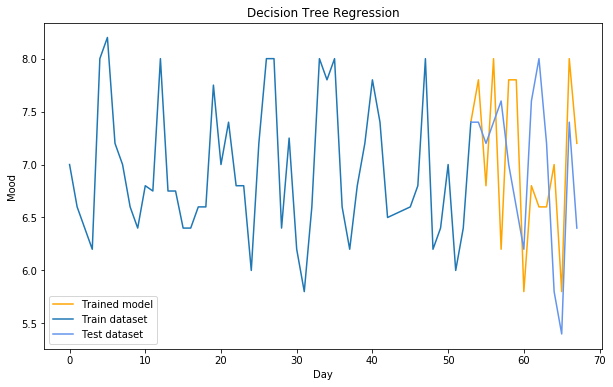

In [90]:
# Train part is 4/5 of the data and test part 1/4
train = int(np.floor((len(df_p20)/5)*4))
test =int(np.ceil((len(df_p20)/5)*1))

# Fetch features to train on
df_p20_features = df_p20[['Mood', 'Valence (t-3)', 'Mood (t-1)', 'Valence', 'Entertainment']]

# Training set of Features and Target mood
df_p20_mood_train = df_p20_mood.iloc[:train]
df_p20_train = df_p20.iloc[:train] 

# Test set of Features
df_p20_test = df_p20.iloc[train-1:train+test]

# Extracting features to train on
features = list(df_p20_features.columns[:5])

# Rename training set to X and y
X = df_p20_train[features]
y = df_p20_mood_train 

# Determine depth of tree and train the set
clf = tree.DecisionTreeRegressor(max_depth=10)
model = clf.fit(X, y)

# Test model on test set
tested_model = model.predict(df_p20_test[features])

print('Mean squared error:', mean_squared_error(Y_mood[train-1:train+test], tested_model))

# Plot test and originl data
plt.figure(figsize=(10,6))
plt.plot(X_day[train-1:train+test], tested_model, color="orange",
         label="Trained model")
plt.plot(X_day[:train], Y_mood[:train], label="Train dataset")
plt.plot(X_day[train-1:train+test], Y_mood[train-1:train+test], label="Test dataset",color="cornflowerblue")
plt.xlabel("Day")
plt.ylabel("Mood")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()